In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic

# Num Signals v/s Efficiency Analysis
   For this set of 1500 simulations, I chose a chirp mass of 1.15 and a frequency range from 
4-6Hz, the total number of TFFTs for each simulation is 32. Each signnal is measures with three differnt aplituded 1e-22,1e-23 and 1e-24. To get all of these simulations to run it took approximatly 15 hrs running on my local device. 

In [3]:
#I need to open and load 30 files (but I dont want to do that one by one)
#Lets try to used glob to get all of the files

path="/Users/lianysfeliciano/Nikhef_REU/CSVs" #path to CSV folder

files=glob.glob(path+'/*.csv') 
#using glob to search for all files ending with.csv and grouping them

ls=[] #making empty list to append dfs to

for f in files: #loop to open each df
    temp_df=pd.read_csv(f) 
    ls.append(temp_df) #adding files to list 
    
#merging all df into one big one
df=pd.concat(ls,axis=0) 
print("Shape:",df.shape)
df.head()

Shape: (1500, 31)


,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,4,1,32,9853,1.68625,1.15,4,7,1.000000e-24,4.470225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,3,32,9853,1.34900,1.15,4,7,1.000000e-24,1.827960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,32,9853,1.68625,1.15,4,7,1.000000e-24,1.235559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,32,9853,6.74500,1.15,4,7,1.000000e-24,4.194978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,32,9853,2.02350,1.15,4,7,1.000000e-24,5.573912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#picking our df with same nuber of insjected signas to do analysis 
#I cannot simply index becasue they are mixed up in the big dataset
Num=[1,2,3,4,5,6,7,8,9,10]
N=np.array(df["N"])
for n in Num:
    ls1=[]
    ls2=[]
    ls3=[]
    ls4=[]
    ls5=[]
    ls6=[]
    ls7=[]
    ls8=[]
    ls9=[]
    ls10=[]
    for i in range(len(N)):
        if N[i]==1:
            ls1.append(df.iloc[i])
        elif N[i]==2:
            ls2.append(df.iloc[i])
        elif N[i]==3:
            ls3.append(df.iloc[i])
        elif N[i]==4:
            ls4.append(df.iloc[i])
        elif N[i]==5:
            ls5.append(df.iloc[i])
        elif N[i]==6:
            ls6.append(df.iloc[i])
        elif N[i]==7:
            ls7.append(df.iloc[i])
        elif N[i]==8:
            ls8.append(df.iloc[i])
        elif N[i]==9:
            ls9.append(df.iloc[i])
        elif N[i]==10:
            ls10.append(df.iloc[i])
    
    df1=pd.DataFrame(ls1)
    df2=pd.DataFrame(ls2)
    df3=pd.DataFrame(ls3)
    df4=pd.DataFrame(ls4)
    df5=pd.DataFrame(ls5)
    df6=pd.DataFrame(ls6)
    df7=pd.DataFrame(ls7)
    df8=pd.DataFrame(ls8)
    df9=pd.DataFrame(ls9)
    df10=pd.DataFrame(ls10)        

In [ ]:
#Now we have a df for each signal injection each containing the three different amplitudes
#I can index each to calculate the efficiency
A23=df1.iloc[0:49,:]
A22=df1.iloc[50:99,:]
A24=df1.iloc[100:150,:]
print(A23)

In [ ]:
#doing it for 1 df and to reated func w. same template
N=np.array(df1['N'])
Retireved_N=np.array(df1['Retireved_N'])
h0=np.array(df1["h0"])
a=0
b=0
c=0

for i in range(len(N)):
    if N[i]==Retireved_N[i] and h0[i]==1e-22:
        a+=1

    if N[i]==Retireved_N[i] and h0[i]==1e-23:
        b+=1


    if N[i]==Retireved_N[i]and h0[i]==1e-24:
        c+=1

    E1=a/50
    E2=b/50
    E3=c/50 

print(E1,E2,E3)

#Correct Calculations^

After some test, I noticed that all of the df arent organized the same way sometimes -22 is first and other tiems -24 is first. This means a condition needs to be added to ensure
e-22,e-23 and e-24 are grouped properly.

In [6]:
def Efficiency(N,Retireved_N,h0):
    """
    Enter the number of signals, retreived signals and amplitude 
    columns of the df you desier to get the efficiency for each different amplitude
    """
    
    a=0
    b=0
    c=0
    
    for i in range(len(N)):
        if N[i]==Retireved_N[i] and h0[i]==1.0e-22:
            a+=1
        if N[i]==Retireved_N[i] and h0[i]==1.0e-23:
            b+=1
        if N[i]==Retireved_N[i]and h0[i]==1.0e-24:
            c+=1
    
    E1=a/50
    E2=b/50
    E3=c/50

    return E1,E2,E3

In [7]:
N1=np.array(df1["N"])
R1=np.array(df1["Retireved_N"])
H1=np.array(df1['h0'])

E1,E2,E3=Efficiency(N1,R1,H1)
print(E1,E2,E3)

0.88 0.0 0.0


### Why is it computing 0? Lets trying with just 1 random file

In [ ]:
tdf=pd.read_csv('~/Nikhef_REU/CSVs/df_5Sig_Amp:1e-23.csv')
tdf

N=np.array(tdf["N"])
R=np.array(tdf["Retireved_N"])

a=0
for i in range(len(N)):
    if N[i]==R[i]:
        print(i)
        a+=1
E=a/len(N)
E

In [ ]:
print(N)

print(R)

In [ ]:
for i in range(len(R)):
    if R[i]==5:
        print(i)

It appears there are no instances where all 5 signlas are reteived in which this occures thats why it's zero

## Calcualting Efficiency for Earch df

I was origionnally going to do this also in a loop but, becasue the df is a complex strucutre it takes extra work to get a fuction to let it pass through. Instead I just did it indivisually

In [47]:
E=[]
E2=[]
E3=[]

In [48]:
N1=np.array(df1["N"])
R1=np.array(df1["Retireved_N"])
H1=np.array(df1["h0"])
e1,e2,e3=Efficiency(N1,R1,H1)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [49]:
N2=np.array(df2["N"])
R2=np.array(df2["Retireved_N"])
H2=np.array(df2["h0"])
e1,e2,e3=Efficiency(N2,R2,H2)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [50]:
N3=np.array(df3["N"])
R3=np.array(df3["Retireved_N"])
H3=np.array(df3["h0"])
e1,e2,e3=Efficiency(N3,R3,H3)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [51]:
N4=np.array(df4["N"])
R4=np.array(df4["Retireved_N"])
H4=np.array(df4["h0"])
e1,e2,e3=Efficiency(N4,R4,H4)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [52]:
N5=np.array(df5["N"])
R5=np.array(df5["Retireved_N"])
H5=np.array(df5["h0"])
e1,e2,e3=Efficiency(N5,R5,H5)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [53]:
N6=np.array(df6["N"])
R6=np.array(df6["Retireved_N"])
H6=np.array(df6["h0"])
e1,e2,e3=Efficiency(N6,R6,H6)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [54]:
N7=np.array(df7["N"])
R7=np.array(df7["Retireved_N"])
H7=np.array(df7["h0"])
e1,e2,e3=Efficiency(N7,R7,H7)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [55]:
N8=np.array(df8["N"])
R8=np.array(df8["Retireved_N"])
H8=np.array(df8["h0"])
e1,e2,e3=Efficiency(N8,R8,H8)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [56]:
N9=np.array(df9["N"])
R9=np.array(df9["Retireved_N"])
H9=np.array(df9["h0"])
e1,e2,e3=Efficiency(N9,R9,H9)
E.append(e1)
E2.append(e2)
E3.append(e3)

In [57]:
N10=np.array(df10["N"])
R10=np.array(df10["Retireved_N"])
H10=np.array(df10["h0"])
e1,e2,e3=Efficiency(N10,R10,H10)
E.append(e1)
E2.append(e2)
E3.append(e3)

## Graphing Results 

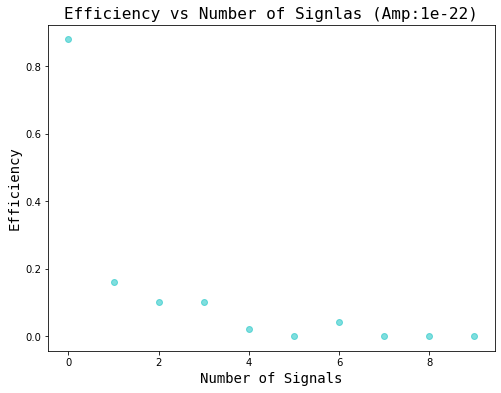

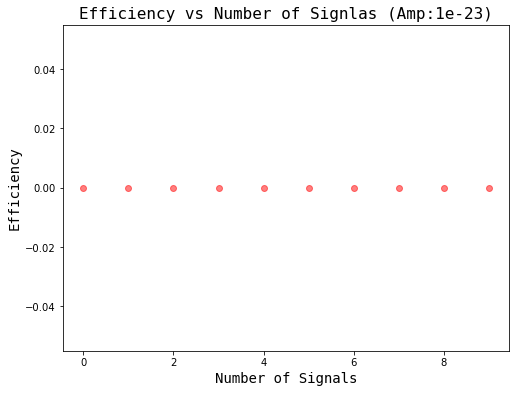

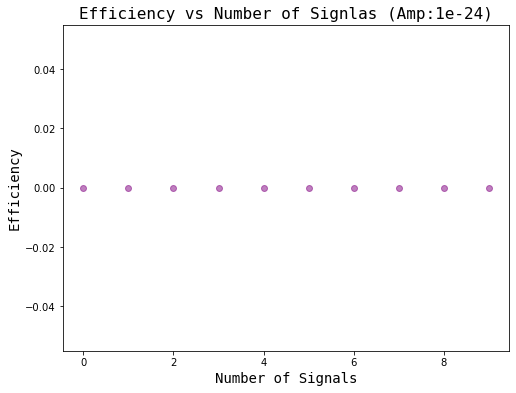

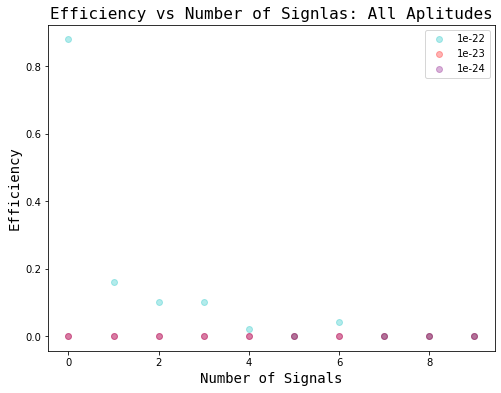

In [63]:

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E,alpha=.5,color="c")
plt.title('Efficiency vs Number of Signlas (Amp:1e-22)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="r")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="purple")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E,alpha=.3,color="c",label='1e-22')
plt.scatter(N,E2,alpha=.3,color="r",label='1e-23')
plt.scatter(N,E3,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend(loc='upper right')

## Analysis
From these results I can see two things, either the chirp mass I chose was too small to detect or the frequency band was very low making ditection dificult. Additionally, I'd like to note that the amplitude 1e-22 was most receptive to returning signals. Perhaps next time larger amplituded need to be added or the chirp mass needs to be increased.